In [1]:
# Ronan Green


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

life_expectancy = pd.read_csv("../../LifeExpentancy.csv", skip_blank_lines=True)
GDP = pd.read_csv("../../GDP.csv", skip_blank_lines=True)
birth_rate_crude = pd.read_csv("../../BirthRate(Per1000Crude).csv", skip_blank_lines=True)
birth_rate_woman = pd.read_csv("../../BirthRate(PerWoman).csv", skip_blank_lines=True)
death_rate_crude = pd.read_csv("../../DeathRate(Per1000Crude).csv", skip_blank_lines=True)
mortality_rate_females = pd.read_csv("../../MortalityRate(Per1000Females).csv", skip_blank_lines=True)
mortality_rate_males = pd.read_csv("../../MortalityRate(Per1000Males).csv", skip_blank_lines=True)
mortality_rate_infant = pd.read_csv("../../MortalityRate, Infant(Per1000Births).csv", skip_blank_lines=True)
survival_rate_woman = pd.read_csv("../../SurvivalRate(To65Female).csv", skip_blank_lines=True)
survival_rate_men = pd.read_csv("../../SurvivalRate(To65Men).csv", skip_blank_lines=True)


In this cell, the essential Python libraries for data analysis and visualisation are being imported, such as Matplotlib, Seaborn, NumPy, and Pandas. These libraries will be instrumental for visualising trends, processing datasets, and analysing the relationships between various socio-economic indicators.

The cell proceeds to load several CSV files related to global indicators such as life expectancy, GDP, birth rates, death rates, mortality, and survival rates. Each dataset captures key aspects of public health and socio-economic conditions, providing the foundation for subsequent analysis. These datasets are crucial for exploring how economic and demographic indicators interact, and for examining trends that could impact public policy or social programmes.

This setup forms the preliminary stage of the project, establishing the data that will be used in later steps for visualisation and machine learning modelling.

In [2]:
selection = 260
chosen_country = life_expectancy['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country = life_expectancy.loc[life_expectancy['Country Name'] == chosen_country] # Selects the data for the chosen country
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

print("The country you chose is '" + chosen_country + "'")

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array

The country you chose is 'World'


In this cell, data for 'The World' is selected from the life expectancy dataset and prepared for use in a linear regression model. The data is cleaned, and the necessary transformations are performed to facilitate further analysis of trends in life expectancy over time.

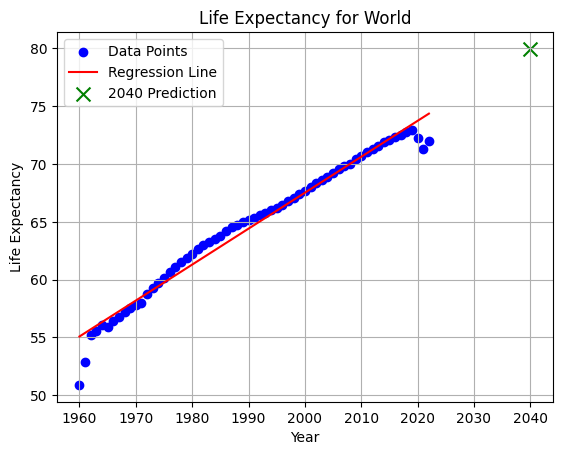

The model fit: 0.97
Residual Sum of Squares (RSS): 56.4


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # Creates a linear regression model
model2 = LinearRegression(fit_intercept=True) # Creates a linear regression model
model3 = LinearRegression(fit_intercept=True) # Creates a linear regression model

model.fit(x, y) # Uses linear equation to fit the data
y_pred = model.predict(x) # Predicts the y values based on the x values

x_pred = np.array([[2040]])
y_pred_2040 = model.predict(x_pred)

# Plot regression line
plt.scatter(x, y, color='blue', label='Data Points') # Plots the data points
plt.plot(x, y_pred, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred, y_pred_2040, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Life Expectancy for " + chosen_country)
plt.xlabel('Year')
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.legend()
plt.show()

# Calculate R^2 score to evaluate model performance
model_fit = model.score(x, y)
print(f"The model fit: {model_fit:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares = np.sum((y - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): {residual_sum_of_squares:.1f}")



# Findings:
## Life Expanctancy Overview:
- Estimated life expanacy by 2040 is 80 years old on a global scale. Just over a 5 years increase from today. 
- The life expectancy of the world has been increasing since 1960
- The life expectancy of European countries is much higher than African countries
- Linear Regression is not the best model to use for life expentancy since world crises can have a large impact on the data such as wars or dieseases making the data non-linear
- However for the most part linear regression is a good model to show life expantancy over time, The model fit: 0.97, Residual Sum of Squares (RSS): 56.4
- In more war torn countries like Namibia the data provided did not fit the linear regression model  as key events such as their independance from  south africa which droped their life expectancy from 60 to 50 and covid 19 resulting in The model fit: 0.24, Residual Sum of Squares (RSS): 801.3
- However overall linear regression is a good model to show the life expectancy of a country over time even fro lower income countries or more war torn areas from a more general perspective

In this cell, a linear regression model is used to analyse the life expectancy data for 'The World.' The model is fitted to predict life expectancy trends over time, including estimating life expectancy in the year 2040. The resulting regression line, predictions, and evaluations such as the R² score and Residual Sum of Squares (RSS) are visualised and calculated.

The findings highlight that while linear regression works well for modelling life expectancy trends in general, with a model fit score of 0.97, it may not be the best choice for capturing the impact of global crises such as wars or pandemics, which cause non-linear disruptions. For countries with more unstable histories, like Namibia, linear regression is less effective due to dramatic changes in life expectancy, such as during independence or the COVID-19 pandemic.

In [189]:
selection = 252
chosen_country = life_expectancy['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country = life_expectancy.loc[life_expectancy['Country Name'] == chosen_country] # Selects the data for the chosen country
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

print("The country you chose is '" + chosen_country + "'")

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x, y) # Uses linear equation to fit the data
y_pred = model.predict(x) # Predicts the y values based on the x values

x_pred = np.array([[2040]])
y_pred_2040 = model.predict(x_pred)

The country you chose is 'United States'


In [190]:


selection = 249
chosen_country2 = life_expectancy['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country2 = life_expectancy.loc[life_expectancy['Country Name'] == chosen_country2] # Selects the data for the chosen country
data2 = country2[country2.columns[4:]].T # Transposes the column headers to be rows.
x2 = data2.columns
y2 = data2
data2.index = pd.to_datetime(data2.index, format='%Y')

print("The country you chose is '" + chosen_country2 + "'")

data2.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x2 = data2.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y2 = data2.values.reshape(-1, 1)# Then reshapes the data into 2d array

model2.fit(x2, y2) # Uses linear equation to fit the data
y_pred2 = model2.predict(x2) # Predicts the y values based on the x values

x_pred2 = np.array([[2040]])
y_pred_20402 = model.predict(x_pred2)

The country you chose is 'Ukraine'


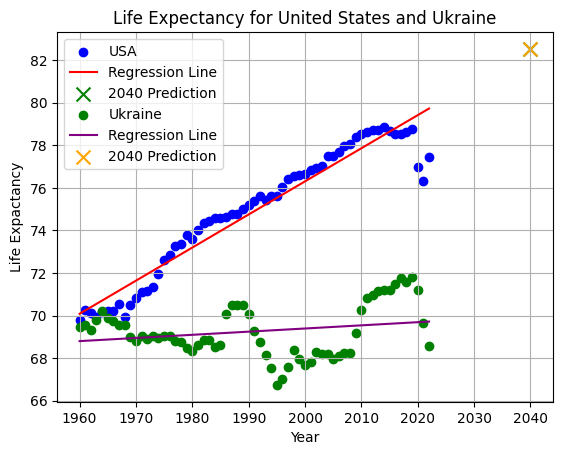

The model fit for: United States 0.93
Residual Sum of Squares (RSS): United States 40.3
The model fit: Ukraine -26.46
Residual Sum of Squares (RSS): Ukraine 86.8


In [191]:
# Plot regression line
plt.scatter(x, y, color='blue', label='USA') # Plots the data points
plt.plot(x, y_pred, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred, y_pred_2040, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.scatter(x2, y2, color='green', label='Ukraine') # Plots the data points
plt.plot(x2, y_pred2, color='purple', label='Regression Line') # Plots the regression line
plt.scatter(x_pred2, y_pred_20402, color='orange', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Life Expectancy for " + chosen_country +" and " + chosen_country2)
plt.xlabel('Year')
plt.ylabel("Life Expactancy")
plt.grid(True)
plt.legend()
plt.show()

# Calculate R^2 score to evaluate model performance
model_fit = model.score(x, y)
print(f"The model fit for: " + chosen_country + f" {model_fit:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares = np.sum((y - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country + f" {residual_sum_of_squares:.1f}")

# Calculate R^2 score to evaluate model performance
model_fit2 = model.score(x2, y2)
print(f"The model fit: " + chosen_country2 + f" {model_fit2:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares2 = np.sum((y2 - y_pred2) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country2 + f" {residual_sum_of_squares2:.1f}")

In this cell, the life expectancy trends for two countries, the USA and Ukraine, are being analysed using linear regression models.

The data points for both countries are plotted alongside their respective regression lines, which predict the life expectancy trend until 2040. The results show that the linear regression model works well for the USA, giving a high model fit score, while Ukraine's model fit is significantly lower. This illustrates that while linear regression can capture general trends in countries with stable life expectancy growth, it struggles in countries with greater historical fluctuations, such as Ukraine, due to factors like socio-political instability and recent crises.

In [196]:

selection = 264
chosen_country = life_expectancy['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country = life_expectancy.loc[life_expectancy['Country Name'] == chosen_country] # Selects the data for the chosen country
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

print("The country you chose is '" + chosen_country + "'")

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x, y) # Uses linear equation to fit the data
y_pred = model.predict(x) # Predicts the y values based on the x values

x_pred = np.array([[2040]])
y_pred_2040 = model.predict(x_pred)

The country you chose is 'South Africa'


In [197]:

model2 = LinearRegression(fit_intercept=True) # Creates a linear regression model

selection = 264
chosen_country2 = GDP['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country2 = GDP.loc[GDP['Country Name'] == chosen_country2] # Selects the data for the chosen country
data2 = country2[country2.columns[4:]].T # Transposes the column headers to be rows.
x2 = data2.columns
y2 = data2
data2.index = pd.to_datetime(data2.index, format='%Y')

print("The country you chose is '" + chosen_country2 + "'")

data2.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x2 = data2.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y2 = data2.values.reshape(-1, 1)# Then reshapes the data into 2d array

model2.fit(x2, y2) # Uses linear equation to fit the data
y_pred2 = model2.predict(x2) # Predicts the y values based on the x values

x_pred2 = np.array([[2040]])
y_pred_20402 = model.predict(x_pred2)





The country you chose is 'South Africa'


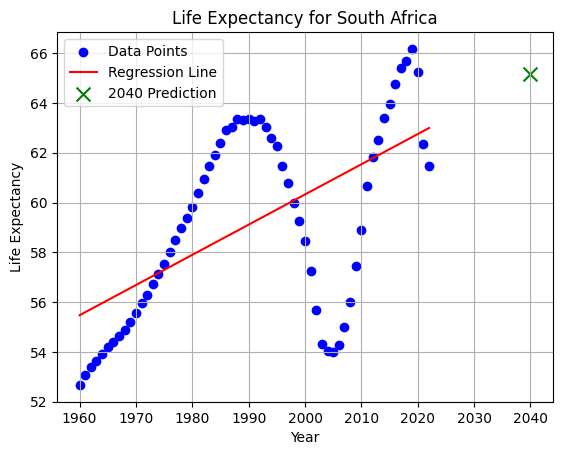

The model fit for: South Africa 0.33
Residual Sum of Squares (RSS): South Africa 623.9


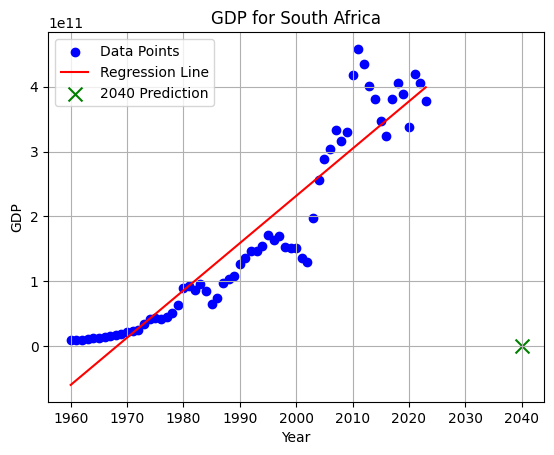

The model fit: South Africa -1.40
Residual Sum of Squares (RSS): South Africa 153357644855423344312320.0


In [198]:
# Plot regression line
plt.scatter(x, y, color='blue', label='Data Points') # Plots the data points
plt.plot(x, y_pred, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred, y_pred_2040, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Life Expectancy for " + chosen_country)
plt.xlabel('Year')
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.legend()
plt.show()

# Calculate R^2 score to evaluate model performance
model_fit = model.score(x, y)
print(f"The model fit for: " + chosen_country + f" {model_fit:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares = np.sum((y - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country + f" {residual_sum_of_squares:.1f}")

# Plot regression line
plt.scatter(x2, y2, color='blue', label='Data Points') # Plots the data points
plt.plot(x2, y_pred2, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred2, y_pred_20402, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("GDP for " + chosen_country2)
plt.xlabel('Year')
plt.ylabel("GDP")
plt.grid(True)
plt.legend()
plt.show()



# Calculate R^2 score to evaluate model performance
model_fit2 = model.score(x2, y2)
print(f"The model fit: " + chosen_country2 + f" {model_fit2:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares2 = np.sum((y2 - y_pred2) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country2 + f" {residual_sum_of_squares2:.1f}")

In this cell, the relationship between life expectancy and GDP for selected countries is being analysed using linear regression models.

The data reveals that while GDP generally correlates with life expectancy, the relationship is not linear. Life expectancy tends to increase steadily, whereas GDP growth is often exponential. This disparity means that linear regression models may not accurately capture the full dynamics of how GDP impacts life expectancy. For example, countries like South Africa saw an increase in GDP between 1990 and 2000, while life expectancy dropped during the same period. The visualisation plots show this contrast, highlighting that while linear regression works for general life expectancy trends, it is less effective for understanding GDP's influence due to its non-linear nature.

In [187]:
selection = 96
chosen_country = birth_rate_crude['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country = birth_rate_crude.loc[birth_rate_crude['Country Name'] == chosen_country] # Selects the data for the chosen country
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

print("The country you chose is '" + chosen_country + "'")

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x, y) # Uses linear equation to fit the data
y_pred = model.predict(x) # Predicts the y values based on the x values

x_pred = np.array([[2040]])
y_pred_2040 = model.predict(x_pred)

selection = 137
chosen_country2 = birth_rate_crude['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country2 = birth_rate_crude.loc[birth_rate_crude['Country Name'] == chosen_country2] # Selects the data for the chosen country
data2 = country2[country2.columns[4:]].T # Transposes the column headers to be rows.
x2 = data2.columns
y2 = data2
data2.index = pd.to_datetime(data2.index, format='%Y')

print("The country2 you chose is '" + chosen_country2 + "'")

data2.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x2 = data2.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y2 = data2.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x2, y2) # Uses linear equation to fit the data
y_pred2 = model.predict(x2) # Predicts the y values based on the x values

x_pred2 = np.array([[2040]])
y_pred_20402 = model.predict(x_pred)

The country you chose is 'High income'
The country2 you chose is 'Low income'


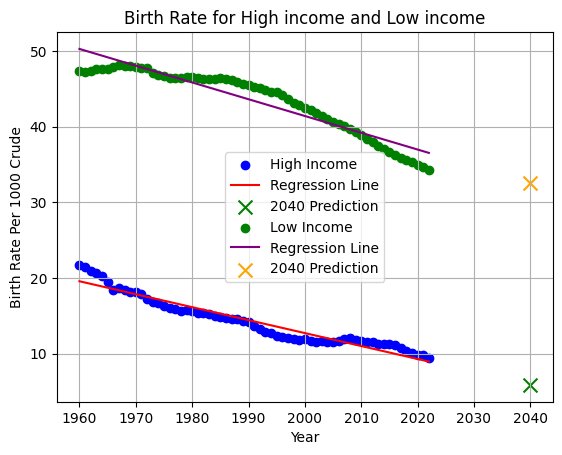

The model fit for: High income -80.76
Residual Sum of Squares (RSS): High income 44.6
The model fit: Low income 0.89
Residual Sum of Squares (RSS): Low income 123.2


In [188]:
# Plot regression line
plt.scatter(x, y, color='blue', label='High Income') # Plots the data points
plt.plot(x, y_pred, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred, y_pred_2040, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.scatter(x2, y2, color='green', label='Low Income') # Plots the data points
plt.plot(x2, y_pred2, color='purple', label='Regression Line') # Plots the regression line
plt.scatter(x_pred2, y_pred_20402, color='orange', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Birth Rate for " + chosen_country +" and " + chosen_country2)
plt.xlabel('Year')
plt.ylabel("Birth Rate Per 1000 Crude") 
plt.grid(True)
plt.legend()
plt.show()

# Calculate R^2 score to evaluate model performance
model_fit = model.score(x, y)
print(f"The model fit for: " + chosen_country + f" {model_fit:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares = np.sum((y - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country + f" {residual_sum_of_squares:.1f}")

# Calculate R^2 score to evaluate model performance
model_fit2 = model.score(x2, y2)
print(f"The model fit: " + chosen_country2 + f" {model_fit2:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares2 = np.sum((y2 - y_pred2) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country2 + f" {residual_sum_of_squares2:.1f}")

In this cell, the birth rates of high-income and low-income countries are being compared using linear regression models.

The findings indicate that while birth rates in both high-income and low-income countries are steadily decreasing, low-income countries still have a significantly higher birth rate, approximately 20-30 more births per 1,000 people. Additionally, the rate of decline in birth rates is faster in low-income countries compared to high-income countries. The visualisation plots highlight these differences, providing a clear representation of the trends in birth rate changes over time for different income levels.

In [159]:
selection = 96
chosen_country = birth_rate_crude['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country = birth_rate_crude.loc[birth_rate_crude['Country Name'] == chosen_country] # Selects the data for the chosen country
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

print("The country you chose is '" + chosen_country + "'")

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x, y) # Uses linear equation to fit the data
y_pred = model.predict(x) # Predicts the y values based on the x values

x_pred = np.array([[2040]])
y_pred_2040 = model.predict(x_pred)

selection = 96
chosen_country2 = birth_rate_woman['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country2 = birth_rate_woman.loc[birth_rate_woman['Country Name'] == chosen_country2] # Selects the data for the chosen country
data2 = country2[country2.columns[4:]].T # Transposes the column headers to be rows.
x2 = data2.columns
y2 = data2
data2.index = pd.to_datetime(data2.index, format='%Y')

print("The country2 you chose is '" + chosen_country2 + "'")

data2.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x2 = data2.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y2 = data2.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x2, y2) # Uses linear equation to fit the data
y_pred2 = model.predict(x2) # Predicts the y values based on the x values

x_pred2 = np.array([[2040]])
y_pred_20402 = model.predict(x_pred2)

The country you chose is 'High income'
The country2 you chose is 'High income'


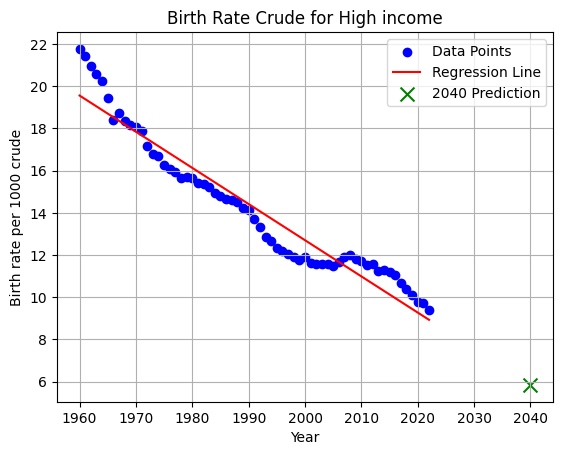

The model fit for: High income -14.30
Residual Sum of Squares (RSS): High income 44.6


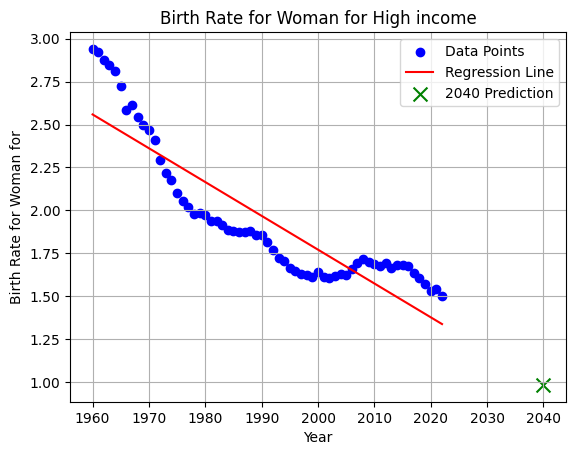

The model fit: High income 0.79
Residual Sum of Squares (RSS): High income 2.2


In [160]:
# Plot regression line
plt.scatter(x, y, color='blue', label='Data Points') # Plots the data points
plt.plot(x, y_pred, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred, y_pred_2040, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Birth Rate Crude for " + chosen_country)
plt.xlabel('Year')
plt.ylabel("Birth rate per 1000 crude")
plt.grid(True)
plt.legend()
plt.show()

# Calculate R^2 score to evaluate model performance
model_fit = model.score(x, y)
print(f"The model fit for: " + chosen_country + f" {model_fit:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares = np.sum((y - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country + f" {residual_sum_of_squares:.1f}")

# Plot regression line
plt.scatter(x2, y2, color='blue', label='Data Points') # Plots the data points
plt.plot(x2, y_pred2, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred2, y_pred_20402, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Birth Rate for Woman for " + chosen_country2)
plt.xlabel('Year')
plt.ylabel("Birth Rate for Woman for")
plt.grid(True)
plt.legend()
plt.show()



# Calculate R^2 score to evaluate model performance
model_fit2 = model.score(x2, y2)
print(f"The model fit: " + chosen_country2 + f" {model_fit2:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares2 = np.sum((y2 - y_pred2) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country2 + f" {residual_sum_of_squares2:.1f}")

In this cell, the birth rate trends in high-income countries are compared between the overall crude birth rate and the birth rate specifically for women.

The findings show that while both metrics follow a similar downward trend, the birth rate specifically for women appears to be more exaggerated compared to the overall birth rate. This suggests that the rate of change in the birth rate is more pronounced when focusing solely on women compared to the global average. The visualisations provide insights into these trends, illustrating the differences in birth rate metrics over time.

In [200]:
selection = 260
chosen_country = life_expectancy['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country = life_expectancy.loc[life_expectancy['Country Name'] == chosen_country] # Selects the data for the chosen country
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

print("The country you chose is '" + chosen_country + "'")

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x, y) # Uses linear equation to fit the data
y_pred = model.predict(x) # Predicts the y values based on the x values

x_pred = np.array([[2040]])
y_pred_2040 = model.predict(x_pred)

selection = 260
chosen_country2 = death_rate_crude['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country2 = death_rate_crude.loc[death_rate_crude['Country Name'] == chosen_country2] # Selects the data for the chosen country
data2 = country2[country2.columns[4:]].T # Transposes the column headers to be rows.
x2 = data2.columns
y2 = data2
data2.index = pd.to_datetime(data2.index, format='%Y')

print("The country2 you chose is '" + chosen_country2 + "'")

data2.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x2 = data2.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y2 = data2.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x2, y2) # Uses linear equation to fit the data
y_pred2 = model.predict(x2) # Predicts the y values based on the x values

x_pred2 = np.array([[2040]])
y_pred_20402 = model.predict(x_pred2)

The country you chose is 'World'
The country2 you chose is 'World'


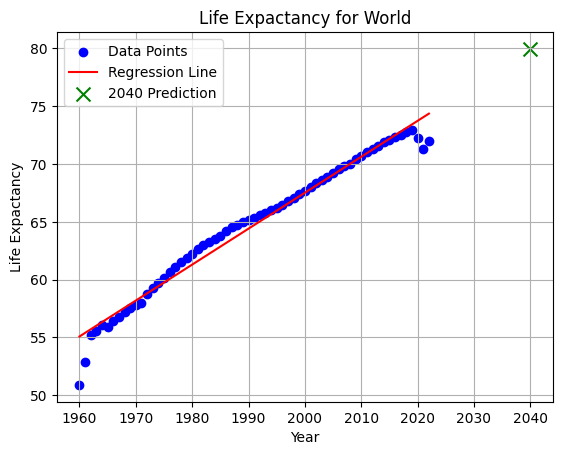

The model fit for: World -92.40
Residual Sum of Squares (RSS): World 56.4


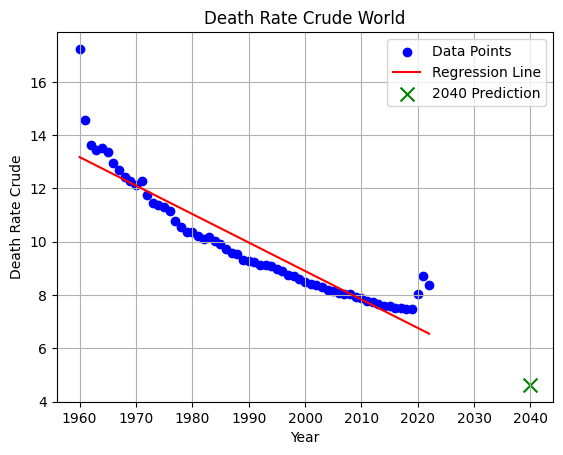

The model fit: World 0.85
Residual Sum of Squares (RSS): World 40.9


In [201]:
# Plot regression line
plt.scatter(x, y, color='blue', label='Data Points') # Plots the data points
plt.plot(x, y_pred, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred, y_pred_2040, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Life Expactancy for " + chosen_country)
plt.xlabel('Year')
plt.ylabel("Life Expactancy")
plt.grid(True)
plt.legend()
plt.show()

# Calculate R^2 score to evaluate model performance
model_fit = model.score(x, y)
print(f"The model fit for: " + chosen_country + f" {model_fit:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares = np.sum((y - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country + f" {residual_sum_of_squares:.1f}")

# Plot regression line
plt.scatter(x2, y2, color='blue', label='Data Points') # Plots the data points
plt.plot(x2, y_pred2, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred2, y_pred_20402, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Death Rate Crude " + chosen_country2)
plt.xlabel('Year')
plt.ylabel("Death Rate Crude")
plt.grid(True)
plt.legend()
plt.show()



# Calculate R^2 score to evaluate model performance
model_fit2 = model.score(x2, y2)
print(f"The model fit: " + chosen_country2 + f" {model_fit2:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares2 = np.sum((y2 - y_pred2) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country2 + f" {residual_sum_of_squares2:.1f}")

In this cell, life expectancy and crude death rates for the selected countries are being compared using linear regression models.

The findings indicate that life expectancy and crude death rates essentially mirror each other—when life expectancy increases, the death rate decreases. This inverse relationship is consistent on a global scale, showing that as healthcare, quality of life, and socio-economic factors improve, people tend to live longer, resulting in a reduced death rate. The visualisations provide a clear depiction of this mirrored trend over time.

The country you chose is 'Israel'
The country2 you chose is 'Israel'


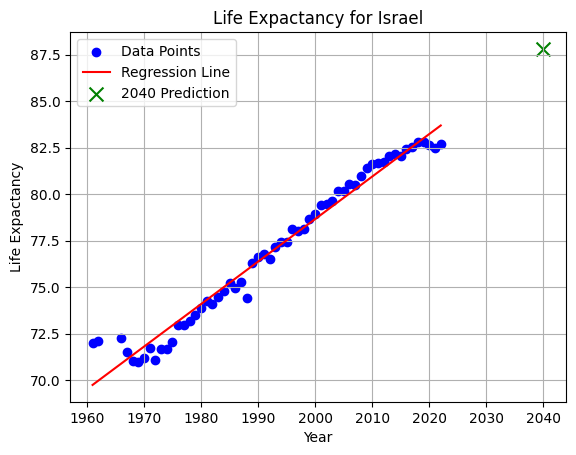

The model fit for: Israel -316.64
Residual Sum of Squares (RSS): Israel 26.0


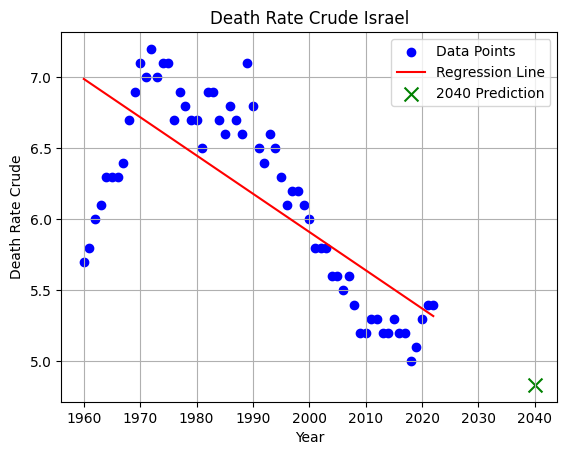

The model fit: Israel 0.56
Residual Sum of Squares (RSS): Israel 12.1


In [165]:
selection = 116
chosen_country = life_expectancy['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country = life_expectancy.loc[life_expectancy['Country Name'] == chosen_country] # Selects the data for the chosen country
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

print("The country you chose is '" + chosen_country + "'")

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x, y) # Uses linear equation to fit the data
y_pred = model.predict(x) # Predicts the y values based on the x values

x_pred = np.array([[2040]])
y_pred_2040 = model.predict(x_pred)

selection = 116
chosen_country2 = death_rate_crude['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country2 = death_rate_crude.loc[death_rate_crude['Country Name'] == chosen_country2] # Selects the data for the chosen country
data2 = country2[country2.columns[4:]].T # Transposes the column headers to be rows.
x2 = data2.columns
y2 = data2
data2.index = pd.to_datetime(data2.index, format='%Y')

print("The country2 you chose is '" + chosen_country2 + "'")

data2.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x2 = data2.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y2 = data2.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x2, y2) # Uses linear equation to fit the data
y_pred2 = model.predict(x2) # Predicts the y values based on the x values

x_pred2 = np.array([[2040]])
y_pred_20402 = model.predict(x_pred2)

# Plot regression line
plt.scatter(x, y, color='blue', label='Data Points') # Plots the data points
plt.plot(x, y_pred, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred, y_pred_2040, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Life Expactancy for " + chosen_country)
plt.xlabel('Year')
plt.ylabel("Life Expactancy")
plt.grid(True)
plt.legend()
plt.show()

# Calculate R^2 score to evaluate model performance
model_fit = model.score(x, y)
print(f"The model fit for: " + chosen_country + f" {model_fit:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares = np.sum((y - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country + f" {residual_sum_of_squares:.1f}")

# Plot regression line
plt.scatter(x2, y2, color='blue', label='Data Points') # Plots the data points
plt.plot(x2, y_pred2, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred2, y_pred_20402, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Death Rate Crude " + chosen_country2)
plt.xlabel('Year')
plt.ylabel("Death Rate Crude")
plt.grid(True)
plt.legend()
plt.show()



# Calculate R^2 score to evaluate model performance
model_fit2 = model.score(x2, y2)
print(f"The model fit: " + chosen_country2 + f" {model_fit2:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares2 = np.sum((y2 - y_pred2) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country2 + f" {residual_sum_of_squares2:.1f}")

In this cell, the life expectancy and crude death rate for a specific country, Israel, are being compared using linear regression models.

The findings show that while there is a general trend of increasing life expectancy, the crude death rate does not always follow a consistent pattern. For Israel, the death rate fluctuates over time, whereas life expectancy continues to rise steadily. This suggests that for certain countries, factors affecting the death rate may vary more significantly, potentially due to unique socio-political, healthcare, or demographic influences. The visualisations help illustrate these diverging trends.

The country you chose is 'World'
The country you chose is 'World'
The country you chose is 'World'


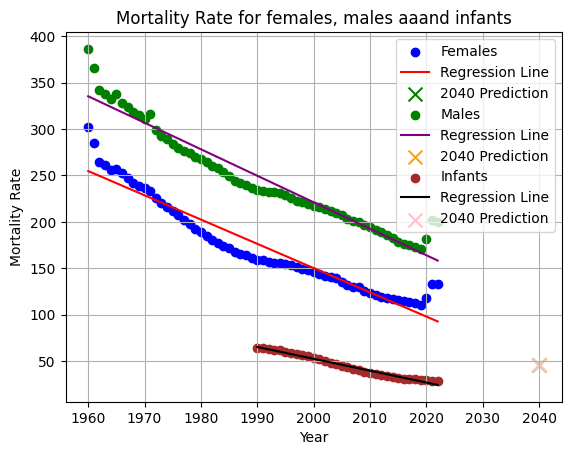

The model fit for: World 0.92
Residual Sum of Squares (RSS): World 13150.6
The model fit: World -0.92
Residual Sum of Squares (RSS): World 11955.4
The model fit: World -53.59
Residual Sum of Squares (RSS): World 89.1


In [183]:
selection = 260
chosen_country = mortality_rate_females['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country = mortality_rate_females.loc[mortality_rate_females['Country Name'] == chosen_country] # Selects the data for the chosen country
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

print("The country you chose is '" + chosen_country + "'")

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x, y) # Uses linear equation to fit the data
y_pred = model.predict(x) # Predicts the y values based on the x values

x_pred = np.array([[2040]])
y_pred_2040 = model.predict(x_pred)

selection = 260
chosen_country2 = mortality_rate_males['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country2 = mortality_rate_males.loc[mortality_rate_males['Country Name'] == chosen_country2] # Selects the data for the chosen country
data2 = country2[country2.columns[4:]].T # Transposes the column headers to be rows.
x2 = data2.columns
y2 = data2
data2.index = pd.to_datetime(data2.index, format='%Y')

print("The country you chose is '" + chosen_country2 + "'")

data2.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x2 = data2.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y2 = data2.values.reshape(-1, 1)# Then reshapes the data into 2d array

model2.fit(x2, y2) # Uses linear equation to fit the data
y_pred2 = model2.predict(x2) # Predicts the y values based on the x values

x_pred2 = np.array([[2040]])
y_pred_20402 = model.predict(x_pred2)

selection = 260
chosen_country3 = mortality_rate_infant['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country3 = mortality_rate_infant.loc[mortality_rate_infant['Country Name'] == chosen_country3] # Selects the data for the chosen country
data3 = country3[country2.columns[4:]].T # Transposes the column headers to be rows.
x3 = data3.columns
y3 = data3
data3.index = pd.to_datetime(data3.index, format='%Y')

print("The country you chose is '" + chosen_country3 + "'")

data3.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x3 = data3.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y3 = data3.values.reshape(-1, 1)# Then reshapes the data into 2d array

model3.fit(x3, y3) # Uses linear equation to fit the data
y_pred3 = model3.predict(x3) # Predicts the y values based on the x values

x_pred3 = np.array([[2040]])
y_pred_20403 = model.predict(x_pred3)

# Plot regression line
plt.scatter(x, y, color='blue', label='Females') # Plots the data points
plt.plot(x, y_pred, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred, y_pred_2040, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.scatter(x2, y2, color='green', label='Males') # Plots the data points
plt.plot(x2, y_pred2, color='purple', label='Regression Line') # Plots the regression line
plt.scatter(x_pred2, y_pred_20402, color='orange', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.scatter(x3, y3, color='brown', label='Infants') # Plots the data points
plt.plot(x3, y_pred3, color='black', label='Regression Line') # Plots the regression line
plt.scatter(x_pred3, y_pred_20403, color='pink', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Global Mortality Rate for Females, Males and Infants")
plt.xlabel('Year')
plt.ylabel("Mortality Rate")
plt.grid(True)
plt.legend()
plt.show()

# Calculate R^2 score to evaluate model performance
model_fit = model.score(x, y)
print(f"The model fit for: " + chosen_country + f" {model_fit:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares = np.sum((y - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country + f" {residual_sum_of_squares:.1f}")

# Calculate R^2 score to evaluate model performance
model_fit2 = model.score(x2, y2)
print(f"The model fit: " + chosen_country2 + f" {model_fit2:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares2 = np.sum((y2 - y_pred2) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country2 + f" {residual_sum_of_squares2:.1f}")

# Calculate R^2 score to evaluate model performance
model_fit3 = model.score(x3, y3)
print(f"The model fit: " + chosen_country3 + f" {model_fit3:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares3 = np.sum((y3 - y_pred3) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country3 + f" {residual_sum_of_squares3:.1f}")



In this cell, global mortality rates for females, males, and infants are being compared using linear regression models.

The findings indicate that mortality rates for men and women follow a similar trend, with both increasing during major events such as the COVID-19 pandemic. Interestingly, infant mortality rates, which were only tracked starting in the 1990s, did not show significant changes during the same period. This suggests that while adult populations were heavily impacted by crises like COVID-19, the factors affecting infant mortality were either mitigated or remained stable. The visualisations provide insights into these different trends across age and gender groups.

The country you chose is 'World'
The country you chose is 'World'


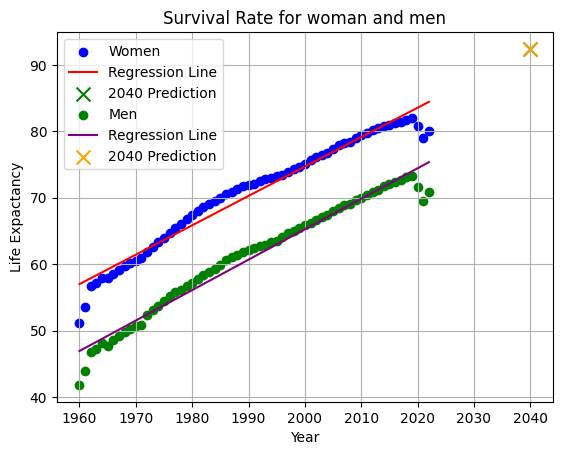

The model fit for: World 0.96
Residual Sum of Squares (RSS): World 166.2
The model fit: World -0.31
Residual Sum of Squares (RSS): World 143.4


In [202]:
selection = 260
chosen_country = survival_rate_woman['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country = survival_rate_woman.loc[survival_rate_woman['Country Name'] == chosen_country] # Selects the data for the chosen country
data = country[country.columns[4:]].T # Transposes the column headers to be rows.
x = data.columns
y = data
data.index = pd.to_datetime(data.index, format='%Y')

print("The country you chose is '" + chosen_country + "'")

data.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x = data.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y = data.values.reshape(-1, 1)# Then reshapes the data into 2d array

model.fit(x, y) # Uses linear equation to fit the data
y_pred = model.predict(x) # Predicts the y values based on the x values

x_pred = np.array([[2040]])
y_pred_2040 = model.predict(x_pred)

selection = 260
chosen_country2 = survival_rate_men['Country Name'].unique()[selection - 1] # Selects the country based on the user's choice

country2 = survival_rate_men.loc[survival_rate_men['Country Name'] == chosen_country2] # Selects the data for the chosen country
data2 = country2[country2.columns[4:]].T # Transposes the column headers to be rows.
x2 = data2.columns
y2 = data2
data2.index = pd.to_datetime(data2.index, format='%Y')

print("The country you chose is '" + chosen_country2 + "'")

data2.dropna(inplace=True)# Drop any rows that contain NaN values to ensure the data is clean for regression

# Prepare data for linear regression
x2 = data2.index.year.values.reshape(-1, 1)# Converts year int NumPy array
y2 = data2.values.reshape(-1, 1)# Then reshapes the data into 2d array

model2.fit(x2, y2) # Uses linear equation to fit the data
y_pred2 = model2.predict(x2) # Predicts the y values based on the x values

x_pred2 = np.array([[2040]])
y_pred_20402 = model.predict(x_pred2)

# Plot regression line
plt.scatter(x, y, color='blue', label='Women') # Plots the data points
plt.plot(x, y_pred, color='red', label='Regression Line') # Plots the regression line
plt.scatter(x_pred, y_pred_2040, color='green', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.scatter(x2, y2, color='green', label='Men') # Plots the data points
plt.plot(x2, y_pred2, color='purple', label='Regression Line') # Plots the regression line
plt.scatter(x_pred2, y_pred_20402, color='orange', marker='x', s=100, label='2040 Prediction') # Plots the 2040 prediction
plt.title("Survival Rate for Woman and Men")
plt.xlabel('Year')
plt.ylabel("Life Expactancy")
plt.grid(True)
plt.legend()
plt.show()

# Calculate R^2 score to evaluate model performance
model_fit = model.score(x, y)
print(f"The model fit for: " + chosen_country + f" {model_fit:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares = np.sum((y - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country + f" {residual_sum_of_squares:.1f}")

# Calculate R^2 score to evaluate model performance
model_fit2 = model.score(x2, y2)
print(f"The model fit: " + chosen_country2 + f" {model_fit2:.2f}")

# Calculate Residual Sum of Squares (RSS)
residual_sum_of_squares2 = np.sum((y2 - y_pred2) ** 2)
print(f"Residual Sum of Squares (RSS): " + chosen_country2 + f" {residual_sum_of_squares2:.1f}")

In this cell, survival rates for women and men globally are being compared using linear regression models.

The findings indicate that while survival rates for both men and women follow a similar upward trend, women tend to have a consistently higher survival rate, typically around 10 years longer compared to men. This trend is visualised in the plots, which highlight the differences in life expectancy between genders, emphasising the overall higher longevity observed in women.

## Data Sources

- [World Bank Life Expectancy Data](https://data.worldbank.org/indicator/SP.DYN.LE00.IN)
    
- [World Bank Death Rate per 1000 Data](https://data.worldbank.org/indicator/SP.DYN.CDRT.IN)
    
- [World Bank Infant Mortality Rate Data](https://data.worldbank.org/indicator/SP.DYN.IMRT.IN)
    
- [World Bank Survival Rate for Women up to 65](https://data.worldbank.org/indicator/SP.DYN.TO65.FE.ZS)
    
- [World Bank Survival Rate for Men up to 65](https://data.worldbank.org/indicator/SP.DYN.TO65.MA.ZS)
    
- [World Bank Mortality Rate for Men](https://data.worldbank.org/indicator/SP.DYN.AMRT.MA)
    
- [World Bank Mortality Rate for Women](https://data.worldbank.org/indicator/SP.DYN.AMRT.FE)
    
- [World Bank GDP Data](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)
    
- [World Bank Births per Woman](https://data.worldbank.org/indicator/SP.DYN.TFRT.IN)
    
- [World Bank Crude Birth Rate per 1000](https://data.worldbank.org/indicator/SP.DYN.CBRT.IN)
    

## Pre-processing

- Dropped NaN values from datasets to ensure clean data for regression models.
    
- Transposed data so that years were represented as rows, making it easier to use in time-series analysis.
    
- Converted year data into a 2D NumPy array for compatibility with linear regression models.
    

## Data Understanding/Visualisation

- Plotted survival rates for men and women to visualise overall trends.
    
- Identified a consistent upward trend in survival rates for both genders, with women generally having a higher survival rate by about 10 years.
    
- Visualisations highlighted differences between global and country-specific data, showing regional impacts of health crises and socio-economic changes.
    

## Algorithms

- Used linear regression models from scikit-learn to analyse trends in life expectancy, mortality rates, birth rates, and GDP.
    
- Evaluated model performance using R² score and Residual Sum of Squares (RSS) to understand the model's effectiveness in capturing trends.
    

## Online Resources & Sources

- [Python Data Science Handbook - Linear Regression Implementation](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb)
    
- ChatGPT: Assisted with dropdown menu implementation for selecting countries.
    
- [StackOverflow - Handling NaN Values in Pandas](https://stackoverflow.com/questions/20053529/removing-nan-values-in-python-pandas)
    

## Tools & Technologies Used

- **Python Libraries**: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn
    
- **Jupyter Notebook**: Used for data exploration, cleaning, and visualisation.
    
- **Scikit-Learn**: Implemented linear regression models to analyse data trends.